# Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('diabetes.csv')


# a)
Set a seed and draw a random sample

In [2]:
np.random.seed(42)  # reproducibility
sample_df = df.sample(n=25)

Computing the statistics

In [3]:
# Sample statistics
sample_mean_glucose = sample_df['Glucose'].mean()
sample_max_glucose = sample_df['Glucose'].max()

# Population statistics
pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose = df['Glucose'].max()

Visual comparision (Bar Chart)

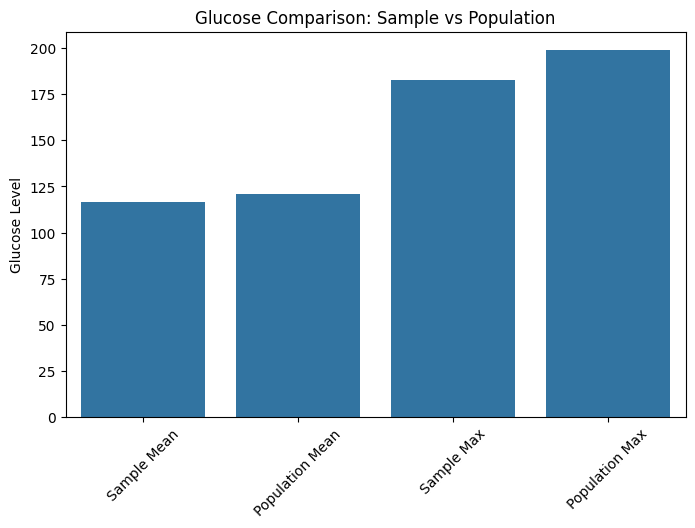

In [4]:
labels = ['Sample Mean', 'Population Mean', 'Sample Max', 'Population Max']
values = [sample_mean_glucose, pop_mean_glucose, sample_max_glucose, pop_max_glucose]

plt.figure(figsize=(8,5))
sns.barplot(x=labels, y=values)
plt.title("Glucose Comparison: Sample vs Population")
plt.ylabel("Glucose Level")
plt.xticks(rotation=45)
plt.show()

#b)
Calculating the 98th percentile

In [5]:
sample_bmi_98 = np.percentile(sample_df['BMI'], 98)
pop_bmi_98 = np.percentile(df['BMI'], 98)

Visual comparision (Bar Graph)

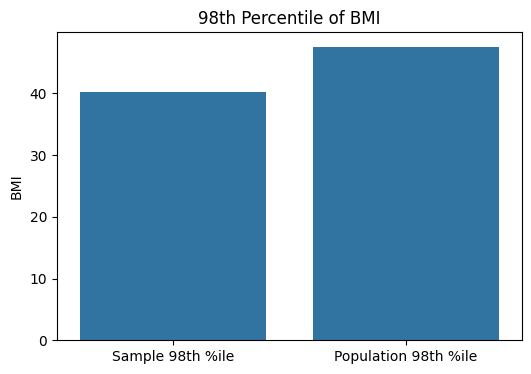

In [6]:
plt.figure(figsize=(6,4))
sns.barplot(x=['Sample 98th %ile', 'Population 98th %ile'], y=[sample_bmi_98, pop_bmi_98])
plt.title("98th Percentile of BMI")
plt.ylabel("BMI")
plt.show()

# c)
Bootstap 500 samples of size 150

In [7]:
boot_means = []
boot_stds = []
boot_percentiles = []

for _ in range(500):
    boot_sample = df.sample(n=150, replace=True)
    bp = boot_sample['BloodPressure']
    boot_means.append(bp.mean())
    boot_stds.append(bp.std())
    boot_percentiles.append(np.percentile(bp, 98))

Computing population statistics

In [8]:
pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_percentile = np.percentile(df['BloodPressure'], 98)

Visual Comparision (Bar Chart)

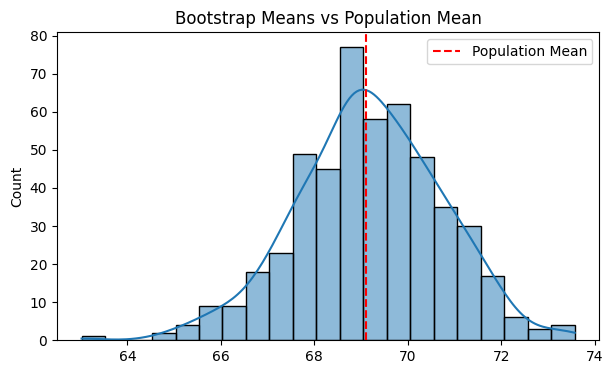

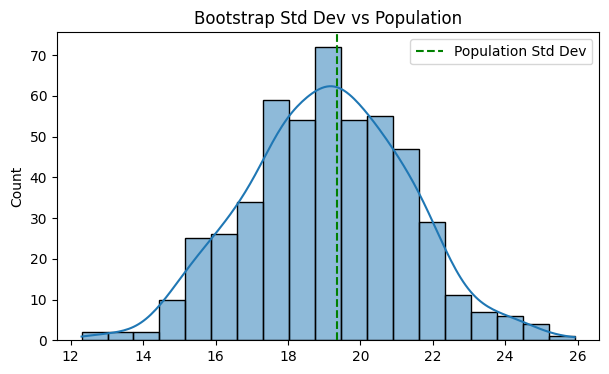

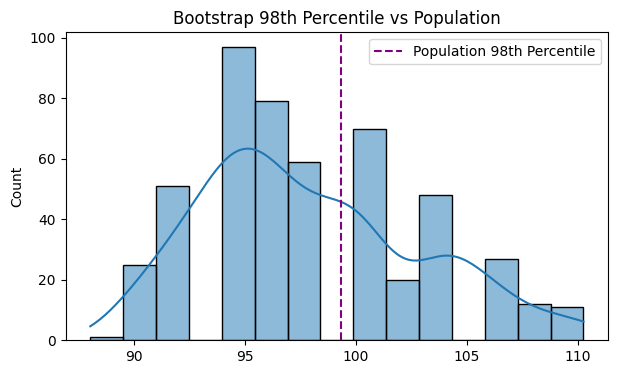

In [9]:
# Mean Comparison
plt.figure(figsize=(7,4))
sns.histplot(boot_means, kde=True)
plt.axvline(pop_mean, color='red', linestyle='--', label='Population Mean')
plt.title('Bootstrap Means vs Population Mean')
plt.legend()
plt.show()

# Standard Deviation Comparison
plt.figure(figsize=(7,4))
sns.histplot(boot_stds, kde=True)
plt.axvline(pop_std, color='green', linestyle='--', label='Population Std Dev')
plt.title('Bootstrap Std Dev vs Population')
plt.legend()
plt.show()

# Percentile Comparison
plt.figure(figsize=(7,4))
sns.histplot(boot_percentiles, kde=True)
plt.axvline(pop_percentile, color='purple', linestyle='--', label='Population 98th Percentile')
plt.title('Bootstrap 98th Percentile vs Population')
plt.legend()
plt.show()